In [83]:
# Setup
# -*- coding: utf-8 -*-

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import numpy as np
import scipy as sp
import pandas as p
from IPython.display import display
from sklearn import datasets, linear_model, preprocessing
from sklearn import metrics, neighbors

In [84]:
# STORE ALL REFORMATTED BATTING DATA AND PITHING DATA W/ SALARIES IN CSV

years = ['2002', '2003', '2004', '2005', '2006', 
         '2007', '2008', '2009', '2010', '2011', 
         '2012', '2013', '2014', '2015', '2016', '2017']

teams = ['ARI','ATL','BAL','BOS','CHC','CHW','CIN','CLE','COL','DET','HOU','KCR','LAA','LAD','MIA','MIL','MIN','NYM','NYY','OAK','PHI','PIT','SDP','SEA','SFG','STL','TBR','TEX','TOR','WSN']

luxury_tax_mult = [1.7, 1.66, 1.62, 1.52, 1.43, 
                   1.32,1.26, 1.2, 1.15, 1.1, 
                   1.1, 1.1, 1.03,1.03, 1.03, 1]

batting_train = p.DataFrame()
pitching_train = p.DataFrame() 
batting_test = p.DataFrame()
pitching_test = p.DataFrame()

for idx, year in enumerate(years):
    # Batting salary data for a year -->
    batting_df = p.read_csv('BattingSalary'+year+'.csv', 
                             engine='python')
    pitching_df = p.read_csv('PitchingSalary'+year+'.csv', 
                             engine='python') 
    
    batting_df['Tm'] = batting_df['Tm'].str.replace('ANA', 'LAA')
    batting_df['Tm'] = batting_df['Tm'].str.replace('MON', 'WSN')
    batting_df['Tm'] = batting_df['Tm'].str.replace('TBD', 'TBR')
    batting_df['Tm'] = batting_df['Tm'].str.replace('FLA', 'MIA')

    pitching_df['Tm'] = pitching_df['Tm'].str.replace('ANA', 'LAA')
    pitching_df['Tm'] = pitching_df['Tm'].str.replace('MON', 'WSN')
    pitching_df['Tm'] = pitching_df['Tm'].str.replace('TBD', 'TBR')
    pitching_df['Tm'] = pitching_df['Tm'].str.replace('FLA', 'MIA')    
    
    batting_df.columns = batting_df.columns.str.replace('Salary▼', 'Salary')
    pitching_df.columns = pitching_df.columns.str.replace('Salary▼', 'Salary')
    
    batting_df['Salary'] = batting_df['Salary'].str.replace('$','')
    pitching_df['Salary'] = pitching_df['Salary'].str.replace('$','')
 
    batting_df['Salary'] = batting_df['Salary'].astype(float)
    pitching_df['Salary'] = pitching_df['Salary'].astype(float)
    
    lux = luxury_tax_mult[idx]
    batting_df['Salary'] *= lux
    pitching_df['Salary'] *= lux
    
    if year == years[0]:
        batting_train = batting_df
        pitching_train = pitching_df
    elif year == years[-1]:
        batting_test = batting_df
        pitching_test = pitching_df
    else:
        batting_train = p.concat([batting_train, batting_df])
        pitching_train = p.concat([pitching_train, pitching_df])

    batting_df.to_csv('BattingStats'+year+'.csv', index=False)
    pitching_df.to_csv('PitchingStats'+year+'.csv', index=False)
        

batting_train.drop(batting_train.columns[[0, 1, -2]], axis=1, inplace=True)
batting_train = batting_train.fillna(0)
batting_test.drop(batting_test.columns[[0, 1, -2]], axis=1, inplace=True)
batting_test = batting_test.fillna(0)

pitching_train.drop(pitching_train.columns[[0,1,-1]], axis=1, inplace=True)
pitching_train = pitching_train.fillna(0)
pitching_test.drop(pitching_test.columns[[0,1,-1]], axis=1, inplace=True)
pitching_test = pitching_test.fillna(0)

batting_train.to_csv('AllBattingData.csv', index=False)
batting_test.to_csv('BattingTest.csv', index=False)

pitching_train.to_csv('AllPitchingData.csv', index=False)
pitching_test.to_csv('PitchingTest.csv', index=False)

# Now remove team for the training data
batting_train.drop(batting_train.columns[[1]], axis=1, inplace=True)
batting_test.drop(batting_test.columns[[1]], axis=1, inplace=True)

pitching_train.drop(pitching_train.columns[[1]], axis=1, inplace=True)
pitching_test.drop(pitching_test.columns[[1]], axis=1, inplace=True)


In [85]:
# FORMAT TRAINING DATA FOR BATTING AND PITCHING
batting_train_y = batting_train[['Salary']]
batting_train_x = batting_train.drop(['Salary'], axis=1)
batting_train_x = batting_train_x.drop(['Pos Summary'], axis=1)

pitching_train_y = pitching_train[['Salary']]
pitching_train_x = pitching_train.drop(['Salary'], axis=1) 

# FORMAT TESTING DATA FOR BATTING AND PITCHING
batting_test_y = batting_test[['Salary']]
batting_test_x = batting_test.drop(['Salary'], axis=1)
batting_test_x = batting_test_x.drop(['Pos Summary'], axis=1)

pitching_test_y = pitching_test[['Salary']]
pitching_test_x = pitching_test.drop(['Salary'], axis=1) 

In [86]:
# PREDICT SALARIES BASED OFF OF STATISTICS
batting_regr = linear_model.LinearRegression()
batting_regr.fit(batting_train_x.values, batting_train_y.values)
print batting_regr.coef_

pitching_regr = linear_model.LinearRegression()
pitching_regr.fit(pitching_train_x.values, pitching_train_y.values)
print pitching_regr.coef_

[[  5.01567318e+05  -3.14842690e+04   2.32731961e+03  -6.78858512e+04
   -1.27949857e+05  -4.01913491e+05   2.58464828e+05   3.32278877e+05
    4.39647194e+03  -3.71878957e+05  -4.50772278e+03   7.79641146e+03
    3.48095366e+06   1.90870458e+07  -1.24197929e+08  -3.05473166e+06
   -5.44105479e+06   2.17614553e+05]]
[[  4.93022796e+05   3.41048708e+04  -2.82310191e+04  -1.08359015e+05
   -1.84470501e+04   1.27855710e+04  -1.42158231e+05  -2.60738937e+05
    5.66345547e+06   5.49548846e+03  -2.47686746e+05  -2.93756548e+05
    1.97579936e+06   1.52169166e+05   1.38297749e+06   8.32809213e+05
    4.82804644e+03   4.40810966e+06  -1.23872588e+06]]


In [90]:
full_twenty = np.zeros((1, 20))

positions = ['3', '4', '5', '6', '7', '8', '9', 'SP', 'RP']

for year in years: 
    year_batting_df = p.read_csv('BattingStats'+year+'.csv', engine='python')
    year_pitching_df = p.read_csv('PitchingStats'+year+'.csv', engine='python')
    year_batting_df.drop(year_batting_df.columns[[0, 1, -2]], axis=1, inplace=True)
    year_batting_df = year_batting_df.fillna(0)
    year_pitching_df.drop(year_pitching_df.columns[[0,1,-1]], axis=1, inplace=True)
    year_pitching_df = year_pitching_df.fillna(0)

    year_batting_df['Pos Summary'] = year_batting_df['Pos Summary'].str.replace('*','')
    year_batting_df['Pos Summary'] = year_batting_df['Pos Summary'].str.replace('/','')
    year_batting_df['Pos Summary'] = year_batting_df['Pos Summary'].str[0:1]
     
    if year == '2017':
        test_success_x = np.zeros((1, 20))
    
    for team in teams:
        print team, year
        year_batting_df = year_batting_df[p.notnull(year_batting_df['Pos Summary'])]
        teamB = year_batting_df[(year_batting_df['Tm'].str.startswith(team))]
        feature_vector = []
        for pos in range(2, 10):
            pos_batting = teamB[(teamB['Pos Summary'].str.startswith(str(pos)))]
            actual_batting_salaries = pos_batting['Salary'].values
            pos_batting.drop(pos_batting.columns[[1,-2, -1]], axis=1, inplace=True)  
            
            if len(pos_batting.values) == 0:
                overpaid = 0.0
                underpaid = 0.0
            else:            
                B_predicted = batting_regr.predict(pos_batting.values) 
                differences = np.ndarray.flatten(B_predicted) - actual_batting_salaries
                overpaid = np.sum(differences[differences > 0])
                underpaid = np.sum(differences[differences < 0])
            feature_vector.append(overpaid)
            feature_vector.append(underpaid)
       
        teamP = year_pitching_df[(year_pitching_df['Tm'].str.startswith(team))]
        # Get starting pitchers
        starting_pitchers = teamP[(teamP['GS'] > 0)]
        starting_pitching_salaries = starting_pitchers['Salary'].values
        starting_pitchers.drop(starting_pitchers.columns[[1, -1]], axis=1, inplace=True)
        P_predicted = pitching_regr.predict(starting_pitchers.values)
        differences = np.ndarray.flatten(P_predicted) - starting_pitching_salaries
        overpaid = np.sum(differences[differences > 0])
        underpaid = np.sum(differences[differences < 0])
        feature_vector.append(overpaid)
        feature_vector.append(underpaid)          
        
        # Relief pitchers
        relief_pitchers = teamP[(teamP['GS'] == 0)]
        relief_pitching_salaries = relief_pitchers['Salary'].values
        relief_pitchers.drop(relief_pitchers.columns[[1, -1]], axis=1, inplace=True)
        P_predicted = pitching_regr.predict(relief_pitchers.values)
        differences = np.ndarray.flatten(P_predicted) - relief_pitching_salaries
        overpaid = np.sum(differences[differences > 0])
        underpaid = np.sum(differences[differences < 0])
        feature_vector.append(overpaid)
        feature_vector.append(underpaid)        
         
        feature_vector = np.asarray(feature_vector)
        B_predicted = p.DataFrame(np.ndarray.flatten(feature_vector))
        
        team_Twenty_Predicted = B_predicted.T
        to_append = team_Twenty_Predicted.values
        
        if year == '2017':
            test_success_x = np.vstack([test_success_x, to_append])             
        else:
            full_twenty = np.vstack([full_twenty, to_append]) 
full_twenty = full_twenty[1:]
test_success_x = test_success_x[1:]

ARI 2002


/Users/harrisoncaruthers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/harrisoncaruthers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/harrisoncaruthers/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


ATL 2002
BAL 2002
BOS 2002
CHC 2002
CHW 2002
CIN 2002
CLE 2002
COL 2002
DET 2002
HOU 2002
KCR 2002
LAA 2002
LAD 2002
MIA 2002
MIL 2002
MIN 2002
NYM 2002
NYY 2002
OAK 2002
PHI 2002
PIT 2002
SDP 2002
SEA 2002
SFG 2002
STL 2002
TBR 2002
TEX 2002
TOR 2002
WSN 2002
ARI 2003
ATL 2003
BAL 2003
BOS 2003
CHC 2003
CHW 2003
CIN 2003
CLE 2003
COL 2003
DET 2003
HOU 2003
KCR 2003
LAA 2003
LAD 2003
MIA 2003
MIL 2003
MIN 2003
NYM 2003
NYY 2003
OAK 2003
PHI 2003
PIT 2003
SDP 2003
SEA 2003
SFG 2003
STL 2003
TBR 2003
TEX 2003
TOR 2003
WSN 2003
ARI 2004
ATL 2004
BAL 2004
BOS 2004
CHC 2004
CHW 2004
CIN 2004
CLE 2004
COL 2004
DET 2004
HOU 2004
KCR 2004
LAA 2004
LAD 2004
MIA 2004
MIL 2004
MIN 2004
NYM 2004
NYY 2004
OAK 2004
PHI 2004
PIT 2004
SDP 2004
SEA 2004
SFG 2004
STL 2004
TBR 2004
TEX 2004
TOR 2004
WSN 2004
ARI 2005
ATL 2005
BAL 2005
BOS 2005
CHC 2005
CHW 2005
CIN 2005
CLE 2005
COL 2005
DET 2005
HOU 2005
KCR 2005
LAA 2005
LAD 2005
MIA 2005
MIL 2005
MIN 2005
NYM 2005
NYY 2005
OAK 2005
PHI 2005
PIT 2005
S

In [97]:
teamWins = p.read_csv('teamWins.csv')
teamWins.drop(teamWins.columns[0], axis=1, inplace=True)
years = teamWins.values.tolist()
success_y_orig = [item for sublist in years for item in sublist]
success_y = success_y_orig[30:]

In [127]:
# PREDICT WINS
wins_regr = linear_model.LinearRegression()
success_y = np.asarray(success_y)
wins_regr.fit(full_twenty, success_y)
print wins_regr.coef_

test_success_y = np.asarray(success_y_orig[:30])

actual = test_success_y.T
predicted = wins_regr.predict(test_success_x).T
sidebyside = np.vstack((actual, predicted))
display(p.DataFrame(sidebyside))

print(metrics.mean_squared_error(actual, predicted))

[  2.47005618e-07  -4.74754962e-07  -3.31966424e-08  -8.21616402e-08
   7.11480878e-08  -3.21837742e-07   3.66907631e-08  -3.16039092e-07
   5.10026467e-08  -1.19501983e-07  -2.90684480e-08  -7.18125874e-08
   1.81645865e-07   4.33640947e-09   3.29752830e-07  -2.06114764e-07
   1.29976069e-09  -3.61186576e-08  -1.15618484e-07  -2.02188894e-08]


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,93.000000,72.000000,75.000000,93.000000,92.00000,67.000000,68.000000,102.000000,87.00000,64.000000,...,66.000000,75.000000,71.000000,64.000000,78.000000,83.000000,80.000000,78.00000,76.000000,97.000000
1,80.185182,81.966389,83.832973,81.507653,86.66319,79.291637,82.182329,81.521266,81.82456,81.129851,...,76.541896,79.535711,78.256492,87.419133,87.660722,82.016111,80.840875,83.64527,89.031208,83.566697


126.10270623


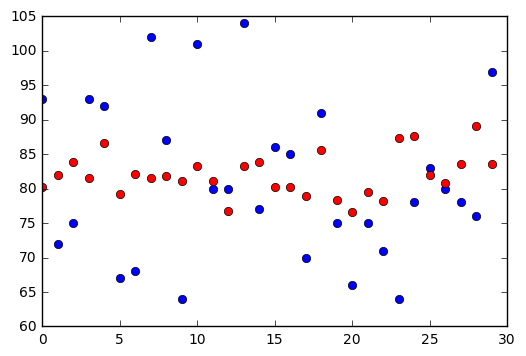

0.0268064127945


In [129]:
plt.plot(np.arange(0,30), actual, 'bo')
plt.plot(np.arange(0,30), predicted, 'ro')
plt.show()
print(metrics.explained_variance_score(actual, predicted))


In [118]:
# K Nearest Neighbors
X = full_twenty
y = success_y
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(X, y) 
# for team in testSet:
#     predictions = neigh.predict([[team]]))
predictions = neigh.predict(test_success_x)

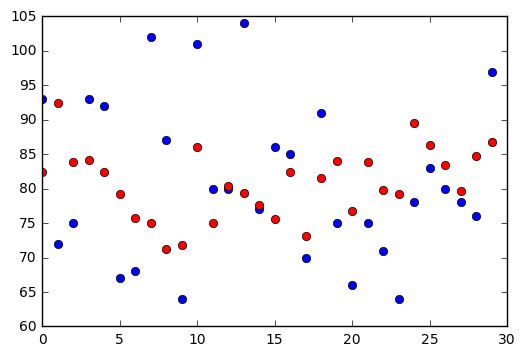

133.973333333
-0.041969571231


In [130]:
plt.plot(np.arange(0,30), test_success_y, 'bo')
plt.plot(np.arange(0,30), pred, 'ro')
plt.show()
print(metrics.mean_squared_error(actual, predictions))
print(metrics.explained_variance_score(actual, predictions))